In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

with open("/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml", "r", encoding="utf-8") as file:
    full_text = file.read()
texts = re.split("<texte", full_text)[1:]

# Vectorisation
vectorizer = CountVectorizer(max_features=100, ngram_range=(1, 2))
X = vectorizer.fit_transform(texts)

# Affichage des mots-clés (vocabulaire)
print("Mots-clés dans le vocabulaire :")
print(vectorizer.get_feature_names_out())

# Affichage de la matrice de fréquence
print("\nMatrice de fréquence (format dense) :")
print(X.toarray())
print(X[0])

Mots-clés dans le vocabulaire :
['ai' 'ans' 'après' 'au' 'aussi' 'autre' 'autres' 'aux' 'avais' 'avait'
 'avec' 'avoir' 'bien' 'ce' 'ce que' 'cette' 'comme' 'dans' 'dans la'
 'dans le' 'dans les' 'de' 'de la' 'des' 'deux' 'du' 'elle' 'en' 'encore'
 'entre' 'est' 'et' 'et de' 'faire' 'fait' 'femme' 'fille' 'fois' 'il'
 'ils' 'jamais' 'je' 'je me' 'je ne' 'je suis' 'la' 'le' 'les' 'leur'
 'lui' 'là' 'ma' 'ma mère' 'mais' 'me' 'mes' 'moi' 'mon' 'monde' 'mère'
 'même' 'ne' 'nous' 'on' 'ou' 'où' 'par' 'pas' 'peut' 'plus' 'pour' 'qu'
 'qu elle' 'qu il' 'qu on' 'quand' 'que' 'que je' 'qui' 'rien' 'sa' 'sans'
 'se' 'ses' 'si' 'son' 'sont' 'suis' 'sur' 'temps' 'toujours' 'tout' 'tu'
 'un' 'une' 'vie' 'ça' 'était' 'été' 'être']

Matrice de fréquence (format dense) :
[[182  46  57 ... 153  46 115]
 [331  50  88 ... 251  50 134]
 [182  65  81 ... 139  50 141]
 ...
 [ 52  14  19 ...  19  15  42]
 [149  61  77 ...  93 117 150]
 [  6  15   9 ...  44  16  14]]
  (0, 47)	1359
  (0, 85)	90
  (0, 31)	672

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Vectorisation des textes (TF-IDF)
vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X = vectorizer.fit_transform(texts)

# Appliquer KMeans avec 2 clusters (correspondant aux périodes revendiquées)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Créer un DataFrame pour visualiser les résultats
periods = ["Période 1"] * 3 + ["Période 2"] * (len(texts) - 3)
data = pd.DataFrame({"Texte": texts, "Cluster": clusters, "Période": periods})

# Afficher les résultats
print(data.groupby(["Cluster", "Période"]).size())

Cluster  Période  
0        Période 1     1
         Période 2     2
1        Période 1     2
         Période 2    14
dtype: int64


In [4]:
print(list(clusters))

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
def cluster_purity(data):
    total_texts = len(data)
    pure_texts = 0
    for cluster, group in data.groupby("Cluster"):
        pure_texts += group["Période"].value_counts().max()
    return pure_texts / total_texts

purity = cluster_purity(data)
print(f"Pureté des clusters : {purity:.2f}")

Pureté des clusters : 0.84


In [6]:
# Textes des clusters mixtes
mixed_clusters = data.groupby("Cluster").filter(lambda x: len(x["Période"].unique()) > 1)
print("Textes dans des clusters mixtes :")
print(mixed_clusters)

Textes dans des clusters mixtes :
                                                Texte  Cluster    Période
0   > \n           Annie Ernaux\n \n \n\n         ...        1  Période 1
1   >   Annie Ernaux\n         \n         \nCe qu’...        0  Période 1
2   >Annie Ernaux\n\n\n\n\n\nLa femme\n\ngelée\n\n...        1  Période 1
3   >ANNIE ERNAUX\n\n  LA PLACE\n\n\n     Gallimar...        1  Période 2
4   > \n\n\n                         Annie Ernaux\...        0  Période 2
5   >Annie Ernaux\n\n\n\n\n\nPassion\n\nsimple\n\n...        1  Période 2
6   >COLLECTION FOLIO\n\n\n\n\n\nAnnie Ernaux\n\n\...        1  Période 2
7   >Annie Ernaux\n\n\n\n\n« Je ne suis pas sortie...        0  Période 2
8   >ANNIE ERNAUX\n\n\nLA HONTE\n\n\n\n\nGALLIMARD...        1  Période 2
9   > \n                  Annie Ernaux\n \n \n\n  ...        1  Période 2
10  >Annie Ernaux\n\n\n\n\n\nSe perdre\n\n\n\n\n\n...        1  Période 2
11  >Collection conçue et dirigée\n\npar Claire De...        1  Période 2
12  

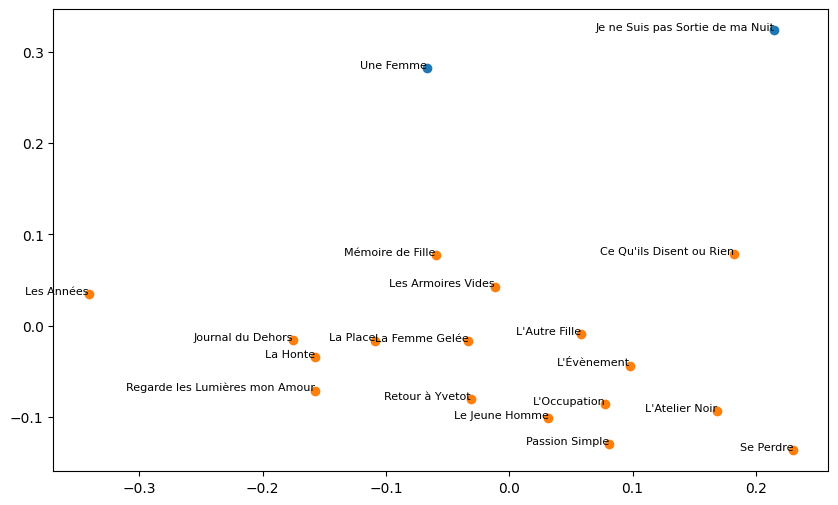

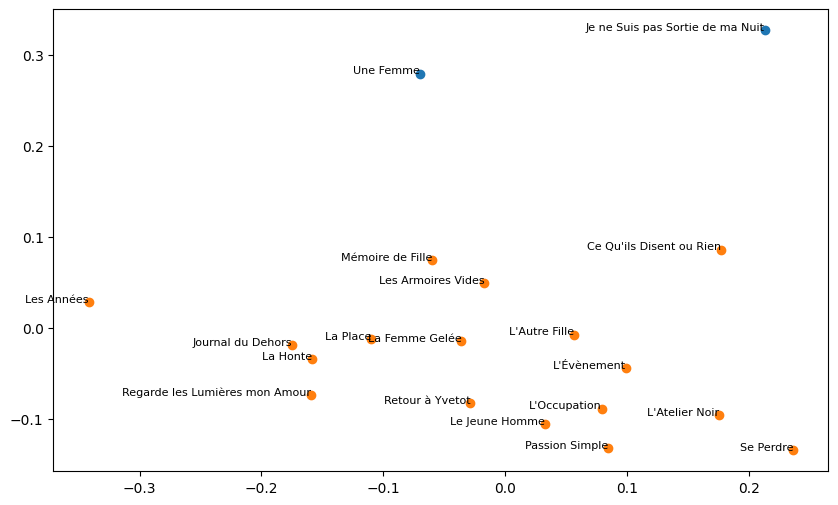

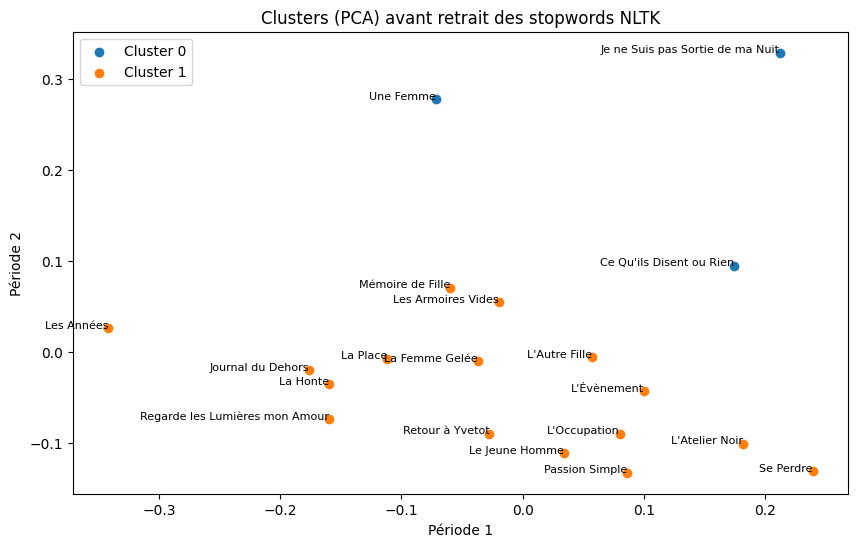

<Figure size 640x480 with 0 Axes>

In [7]:
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Lecture du fichier XML
with open("/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml", "r", encoding="utf-8") as file:
    full_text = file.read()
texts = re.split("<texte", full_text)[1:]

# 4. Liste des titres (correspond à chaque texte)
oeuvres = [
    "Les Armoires Vides", "Ce Qu'ils Disent ou Rien", "La Femme Gelée", "La Place", "Une Femme", 
    "Passion Simple", "Journal du Dehors", "Je ne Suis pas Sortie de ma Nuit", "La Honte", "L'Évènement",
    "Se Perdre", "L'Autre Fille", "L'Occupation", "Les Années", "L'Atelier Noir",
    "Retour à Yvetot", "Regarde les Lumières mon Amour", "Mémoire de Fille", "Le Jeune Homme"
]
assert len(texts) == len(oeuvres), "Le nombre de textes ne correspond pas au nombre d’œuvres."

# 7. Vectorisation TF-IDF (sans stop_words='french', puisqu'on a déjà filtré avec NLTK)
for toto in [100, 200, 500]:

    vectorizer = TfidfVectorizer(
    max_features=toto,
    ngram_range=(1, 2)
)
    X = vectorizer.fit_transform(texts)

# 8. Réduction dimensionnelle avec PCA (2 composantes)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X.toarray())

# 9. Clustering (KMeans)
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    clusters = kmeans.labels_

# 10. Visualisation
    plt.figure(figsize=(10, 6))
    for cluster_id in range(n_clusters):
        cluster_points = X_pca[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0],
                    cluster_points[:, 1],
                    label=f"Cluster {cluster_id}")

# Annoter chaque point par le titre de l'œuvre
    for i, (x_val, y_val) in enumerate(X_pca):
        plt.text(x_val, y_val, 
                oeuvres[i], 
                fontsize=8, 
                ha='right')

plt.title("Clusters (PCA) avant retrait des stopwords NLTK")
plt.xlabel("Période 1")
plt.ylabel("Période 2")
plt.legend()
plt.show()
plt.savefig(f"Figure_{toto}_mots_les_+_fréq.png")

In [8]:
# Récupérer les mots ou n-grammes du TF-IDF
features = vectorizer.get_feature_names_out()

# Obtenir les charges des composantes principales
components = pca.components_

# Créer un DataFrame pour les interpréter facilement
import pandas as pd
pc1_contributions = pd.DataFrame(
    {"Feature": features, "Contribution": components[0]}
).sort_values(by="Contribution", ascending=False)

pc2_contributions = pd.DataFrame(
    {"Feature": features, "Contribution": components[1]}
).sort_values(by="Contribution", ascending=False)

print("Principaux contributeurs à la Composante principale 1 :")
print(pc1_contributions.head(10))

print("\nPrincipaux contributeurs à la Composante principale 2 :")
print(pc2_contributions.head(10))

Principaux contributeurs à la Composante principale 1 :
    Feature  Contribution
212      je      0.576695
375     que      0.236545
275      me      0.198213
0        ai      0.159375
323     pas      0.138047
50       ce      0.125472
149     est      0.123942
199      il      0.123036
379  que je      0.107348
294      ne      0.101186

Principaux contributeurs à la Composante principale 2 :
     Feature  Contribution
131     elle      0.799678
291     mère      0.155338
264  ma mère      0.143589
367  qu elle      0.121296
246      les      0.095108
403       sa      0.092239
263       ma      0.090337
424      son      0.088512
414      ses      0.086328
307       on      0.083483


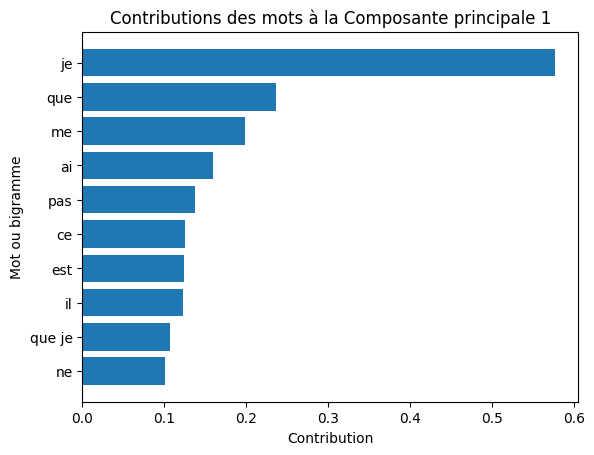

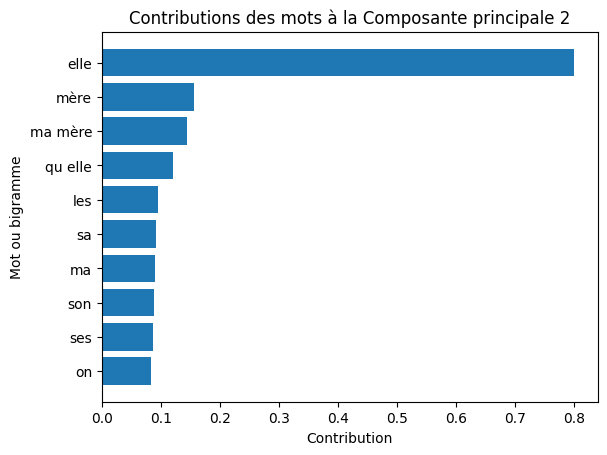

In [9]:
import matplotlib.pyplot as plt

# Visualisation pour la Composante principale 1
top_pc1 = pc1_contributions.head(10)
plt.barh(top_pc1["Feature"], top_pc1["Contribution"])
plt.title("Contributions des mots à la Composante principale 1")
plt.xlabel("Contribution")
plt.ylabel("Mot ou bigramme")
plt.gca().invert_yaxis()  # Inverser pour avoir le plus grand en haut
plt.show()

# Visualisation pour la Composante principale 2
top_pc2 = pc2_contributions.head(10)
plt.barh(top_pc2["Feature"], top_pc2["Contribution"])
plt.title("Contributions des mots à la Composante principale 2")
plt.xlabel("Contribution")
plt.ylabel("Mot ou bigramme")
plt.gca().invert_yaxis()
plt.show()

Nombre de textes extraits et nettoyés : 19


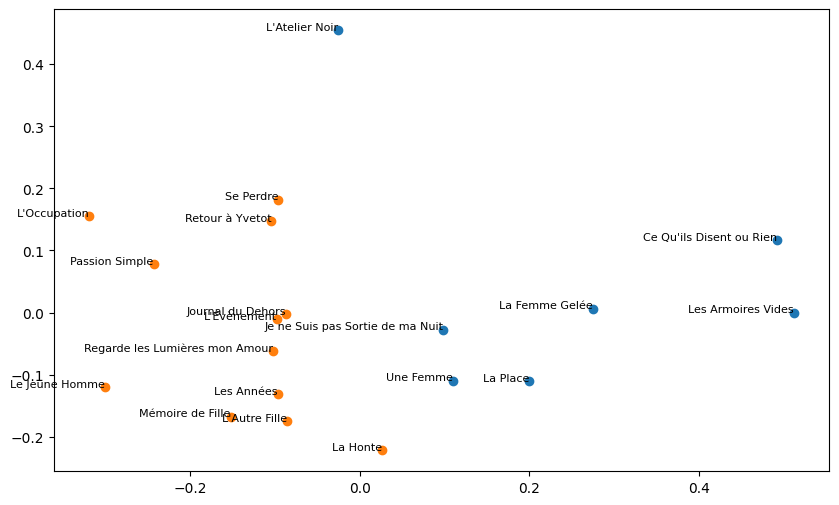

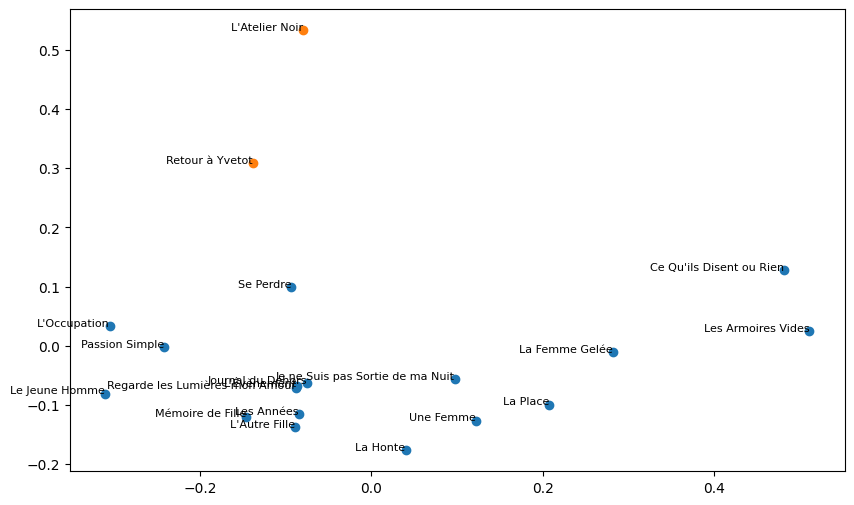

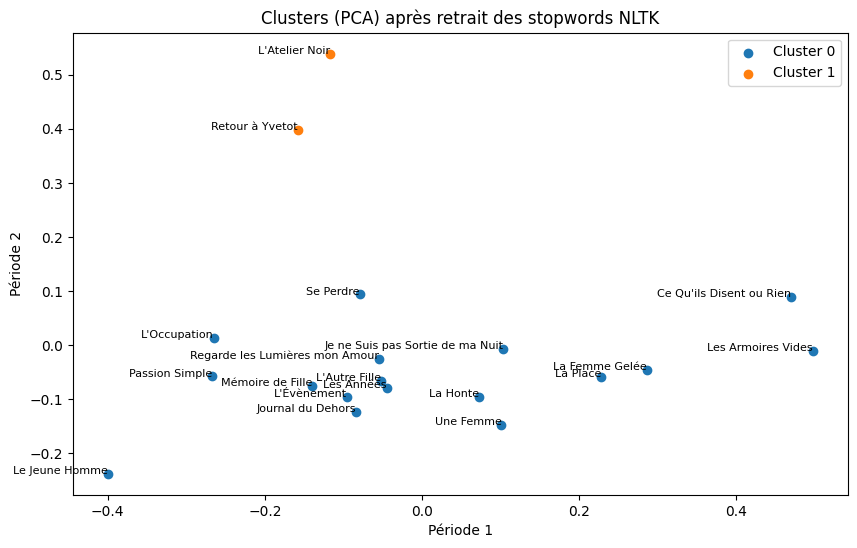

<Figure size 640x480 with 0 Axes>

In [10]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Télécharger les stopwords NLTK (à faire une seule fois)
# nltk.download("stopwords")  # -> à décommenter si pas déjà fait

# 2. Définir l'ensemble de stopwords en français
stopwords_fr = set(stopwords.words('french'))

# 3. Lecture du fichier XML
fichier_xml = "/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml"
with open(fichier_xml, "r", encoding="utf-8") as file:
    full_text = file.read()

# 4. Découper par la balise <texte
segments = re.split(r"<texte", full_text)[1:]  

# 5. Extraire le contenu entre > et </texte>, et nettoyer avec NLTK
texts = []
for seg in segments:
    match = re.search(r">(.*?)</texte>", seg, flags=re.DOTALL)
    if match:
        # Récupère le texte brut
        content = match.group(1).strip()
        
        # Tokenisation NLTK (lang='french' aide à gérer le tokeniseur pour le français)
        tokens = word_tokenize(content, language='french')
        
        # Filtrer les stopwords et éventuellement la ponctuation
        tokens_cleaned = [
            tok for tok in tokens 
            if tok.lower() not in stopwords_fr  # enlève les mots vides
            and tok.isalpha()                   # garde uniquement les mots composés de lettres
        ]
        
        # Reconstruire la chaîne de caractères en retirant les stopwords
        cleaned_text = " ".join(tokens_cleaned)
        texts.append(cleaned_text)

# Contrôle : on doit avoir le même nombre de segments que de textes voulus
print(f"Nombre de textes extraits et nettoyés : {len(texts)}")

# 6. Liste des titres (assure-toi qu'il y en a autant que de textes)
oeuvres = [
    "Les Armoires Vides", "Ce Qu'ils Disent ou Rien", "La Femme Gelée", "La Place", "Une Femme", 
    "Passion Simple", "Journal du Dehors", "Je ne Suis pas Sortie de ma Nuit", "La Honte", "L'Évènement",
    "Se Perdre", "L'Autre Fille", "L'Occupation", "Les Années", "L'Atelier Noir",
    "Retour à Yvetot", "Regarde les Lumières mon Amour", "Mémoire de Fille", "Le Jeune Homme"
]
assert len(texts) == len(oeuvres), "Le nombre de textes ne correspond pas au nombre d’œuvres."

# 7. Vectorisation TF-IDF (sans stop_words='french', puisqu'on a déjà filtré avec NLTK)
for toto in [100, 200, 500]:

    vectorizer = TfidfVectorizer(
    max_features=toto,
    ngram_range=(1, 2)
)
    X = vectorizer.fit_transform(texts)

# 8. Réduction dimensionnelle avec PCA (2 composantes)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X.toarray())

# 9. Clustering (KMeans)
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)
    clusters = kmeans.labels_

# 10. Visualisation
    plt.figure(figsize=(10, 6))
    for cluster_id in range(n_clusters):
        cluster_points = X_pca[clusters == cluster_id]
        plt.scatter(cluster_points[:, 0],
                    cluster_points[:, 1],
                    label=f"Cluster {cluster_id}")

# Annoter chaque point par le titre de l'œuvre
    for i, (x_val, y_val) in enumerate(X_pca):
        plt.text(x_val, y_val, 
                oeuvres[i], 
                fontsize=8, 
                ha='right')

plt.title("Clusters (PCA) après retrait des stopwords NLTK")
plt.xlabel("Période 1")
plt.ylabel("Période 2")
plt.legend()
plt.show()
plt.savefig(f"Figure_{toto}_mots_les_+_fréq_sans_stopwords.png")


In [11]:
# Récupérer les mots ou n-grammes du TF-IDF
features = vectorizer.get_feature_names_out()

# Obtenir les charges des composantes principales
components = pca.components_

# Créer un DataFrame pour les interpréter facilement
import pandas as pd
pc1_contributions = pd.DataFrame(
    {"Feature": features, "Contribution": components[0]}
).sort_values(by="Contribution", ascending=False)

pc2_contributions = pd.DataFrame(
    {"Feature": features, "Contribution": components[1]}
).sort_values(by="Contribution", ascending=False)

print("Principaux contributeurs à la période 1 :")
print(pc1_contributions.head(10))

print("\nPrincipaux contributeurs à la période 2 :")
print(pc2_contributions.head(10))

Principaux contributeurs à la période 1 :
       Feature  Contribution
492         ça      0.476058
260       mère      0.263648
438       tout      0.206831
349       père      0.186066
36        bien      0.171896
371       rien      0.117623
164  gabrielle      0.103871
435   toujours      0.093569
150     filles      0.086236
279    parents      0.084878

Principaux contributeurs à la période 2 :
      Feature  Contribution
179  histoire      0.250028
496  écriture      0.228968
490    yvetot      0.196375
494    écrire      0.192816
261   mémoire      0.190841
342    projet      0.189437
449      très      0.143800
117     début      0.123835
468     ville      0.112947
221     livre      0.105664


In [12]:
# Infinite propagation: calcule la propagation ideale. Utilise l'elbow method pour trouver le nb optimal de clusters
# Elbow clustering: calculer le nombre ideal de clusters
# Clustering hiérarchique: on regroupe les oeuvres par paires

Nombre de textes extraits : 19


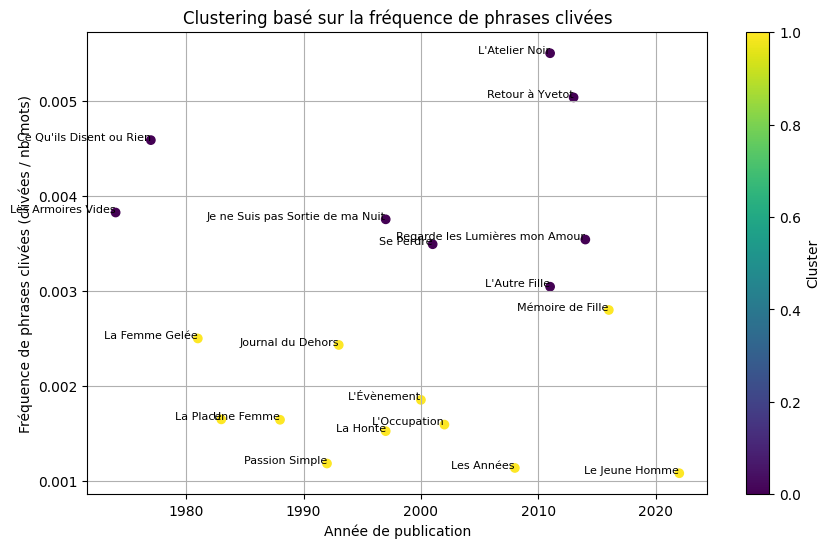

In [13]:
import re
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -----------------------------
# 1) Lecture du fichier XML
# -----------------------------
fichier_xml = "/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml"
with open(fichier_xml, "r", encoding="utf-8") as file:
    full_text = file.read()

# Découpage par <texte ... </texte>
segments = re.split(r"<texte", full_text)[1:]
texts = []
for seg in segments:
    match = re.search(r">(.*?)</texte>", seg, flags=re.DOTALL)
    if match:
        content = match.group(1).strip()
        texts.append(content)

print(f"Nombre de textes extraits : {len(texts)}")

# -----------------------------
# 2) Liste des titres + années (adaptées)
# -----------------------------
oeuvres = [
    "Les Armoires Vides", 
    "Ce Qu'ils Disent ou Rien", 
    "La Femme Gelée", 
    "La Place", 
    "Une Femme", 
    "Passion Simple", 
    "Journal du Dehors", 
    "Je ne Suis pas Sortie de ma Nuit", 
    "La Honte", 
    "L'Évènement",
    "Se Perdre", 
    "L'Autre Fille", 
    "L'Occupation", 
    "Les Années", 
    "L'Atelier Noir",
    "Retour à Yvetot", 
    "Regarde les Lumières mon Amour", 
    "Mémoire de Fille", 
    "Le Jeune Homme"
]

# Exemples d'années (ou d'ordre de publication) à ajuster si besoin :
annees = [
    1974,  # Les Armoires Vides
    1977,  # Ce Qu'ils Disent ou Rien
    1981,  # La Femme Gelée
    1983,  # La Place
    1988,  # Une Femme
    1992,  # Passion Simple
    1993,  # Journal du Dehors
    1997,  # Je ne Suis pas Sortie de ma Nuit
    1997,  # La Honte
    2000,  # L'Évènement
    2001,  # Se Perdre
    2011,  # L'Autre Fille (selon l'édition)
    2002,  # L'Occupation (attention à la chronologie)
    2008,  # Les Années
    2011,  # L'Atelier Noir
    2013,  # Retour à Yvetot
    2014,  # Regarde les Lumières mon Amour
    2016,  # Mémoire de Fille
    2022   # Le Jeune Homme
]

assert len(texts) == len(oeuvres) == len(annees), (
    "Le nombre de textes, de titres et d'années doit être identique !"
)

# -----------------------------
# 3) Définir la fonction pour compter les phrases clivées
# -----------------------------
def count_clivees(text):
    """
    Compte les occurrences du schéma "c’est ... que/qui" (en ignorant la casse).
    """
    pattern = r"\bc['’]?est\s+.*?\s+(que|qui)\b"
    matches = re.findall(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    return len(matches)

# -----------------------------
# 4) Calculer la fréquence de phrases clivées pour chaque texte
# -----------------------------
clivee_counts = []
for txt in texts:
    nb_clivees = count_clivees(txt)
    words = re.findall(r"\w+", txt)
    nb_words = len(words) if words else 1
    freq_clivees = nb_clivees / nb_words  # ratio
    clivee_counts.append(freq_clivees)

# On met ça dans un tableau NumPy
X = np.array(clivee_counts).reshape(-1, 1)

# -----------------------------
# 5) Clustering (KMeans)
# -----------------------------
k = 2  # par exemple, on veut 2 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

# -----------------------------
# 6) Optionnel : réordonner par année croissante
#    pour que l'axe X soit dans l'ordre temporel
# -----------------------------
indices_triees = sorted(range(len(annees)), key=lambda i: annees[i])
annees_ordre = [annees[i] for i in indices_triees]
oeuvres_ordre = [oeuvres[i] for i in indices_triees]
X_ordre = X[indices_triees, :]            # tri de la matrice
clusters_ordre = clusters[indices_triees] # tri des étiquettes

# -----------------------------
# 7) Visualisation
# -----------------------------
plt.figure(figsize=(10, 6))
# On affiche la fréquence (X_ordre[:,0]) en fonction de l'année (annees_ordre)
plt.scatter(annees_ordre, X_ordre[:, 0], c=clusters_ordre, cmap='viridis')

# Annoter chaque point (œuvre)
for i, freq in enumerate(X_ordre[:, 0]):
    plt.text(annees_ordre[i], freq, oeuvres_ordre[i], fontsize=8, ha='right')

plt.title("Clustering basé sur la fréquence de phrases clivées")
plt.xlabel("Année de publication")
plt.ylabel("Fréquence de phrases clivées (clivées / nb mots)")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()

Nombre de textes extraits : 19


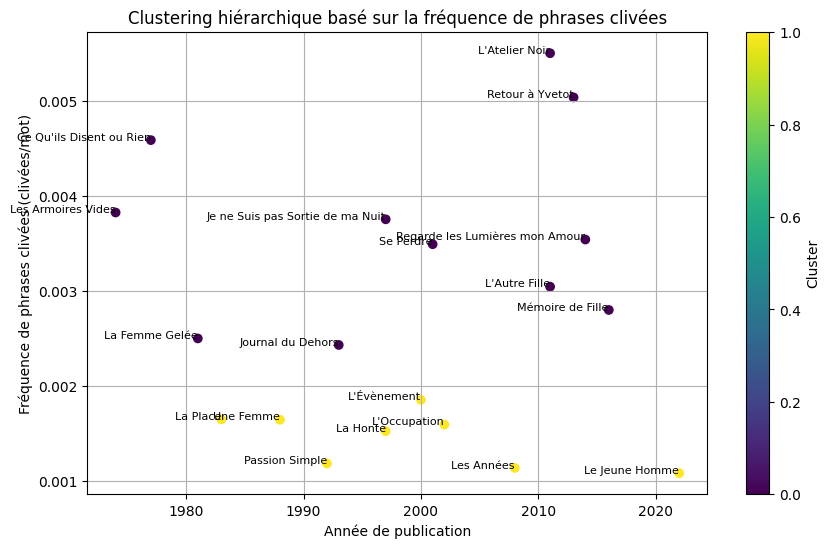

/var/folders/9m/zl8qrjf568b6fg17f2kxg8mr0000gn/T/ipykernel_36966/4240176461.py:150: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(dist_matrix, method='ward')


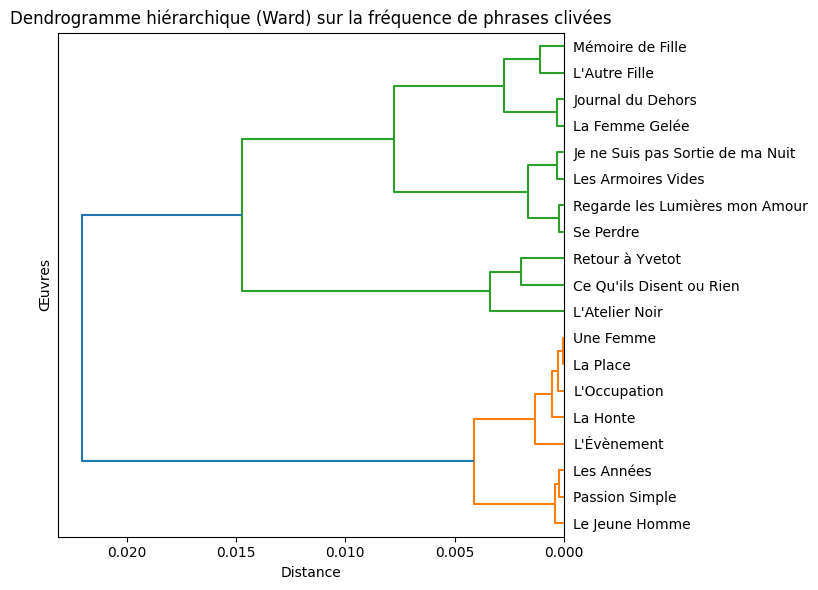

In [14]:
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch

# ------------------------------------------------
# 1) Lecture du fichier XML
# ------------------------------------------------
fichier_xml = "/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml"
with open(fichier_xml, "r", encoding="utf-8") as file:
    full_text = file.read()

# On découpe après <texte
segments = re.split(r"<texte", full_text)[1:]
texts = []
for seg in segments:
    match = re.search(r">(.*?)</texte>", seg, flags=re.DOTALL)
    if match:
        content = match.group(1).strip()
        texts.append(content)

print(f"Nombre de textes extraits : {len(texts)}")

# ------------------------------------------------
# 2) Liste des titres + années
# ------------------------------------------------
oeuvres = [
    "Les Armoires Vides", 
    "Ce Qu'ils Disent ou Rien", 
    "La Femme Gelée", 
    "La Place", 
    "Une Femme", 
    "Passion Simple", 
    "Journal du Dehors", 
    "Je ne Suis pas Sortie de ma Nuit", 
    "La Honte", 
    "L'Évènement",
    "Se Perdre", 
    "L'Autre Fille", 
    "L'Occupation", 
    "Les Années", 
    "L'Atelier Noir",
    "Retour à Yvetot", 
    "Regarde les Lumières mon Amour", 
    "Mémoire de Fille", 
    "Le Jeune Homme"
]

annees = [
    1974,  # Les Armoires Vides
    1977,  # Ce Qu'ils Disent ou Rien
    1981,  # La Femme Gelée
    1983,  # La Place
    1988,  # Une Femme
    1992,  # Passion Simple
    1993,  # Journal du Dehors
    1997,  # Je ne Suis pas Sortie de ma Nuit
    1997,  # La Honte
    2000,  # L'Évènement
    2001,  # Se Perdre
    2011,  # L'Autre Fille (selon l'édition)
    2002,  # L'Occupation
    2008,  # Les Années
    2011,  # L'Atelier Noir
    2013,  # Retour à Yvetot
    2014,  # Regarde les Lumières mon Amour
    2016,  # Mémoire de Fille
    2022   # Le Jeune Homme
]

assert len(texts) == len(oeuvres) == len(annees), (
    "Le nombre de textes, de titres et d'années doit être identique !"
)

# ------------------------------------------------
# 3) Fonction pour compter les phrases clivées
# ------------------------------------------------
def count_clivees(text):
    """
    Détecte la forme : "c’est ... que/qui" en ignorant la casse.
    """
    pattern = r"\bc['’]?est\s+.*?\s+(que|qui)\b"
    matches = re.findall(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    return len(matches)

# ------------------------------------------------
# 4) Calcul de la fréquence de phrases clivées
# ------------------------------------------------
clivee_counts = []
for txt in texts:
    nb_clivees = count_clivees(txt)
    words = re.findall(r"\w+", txt)
    nb_words = len(words) if words else 1
    freq_clivees = nb_clivees / nb_words
    clivee_counts.append(freq_clivees)

# On obtient un tableau Nx1
X = np.array(clivee_counts).reshape(-1, 1)

# ------------------------------------------------
# 5) Clustering hiérarchique (AgglomerativeClustering)
# ------------------------------------------------
n_clusters = 2  # on veut 2 "périodes"
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(X)

# ------------------------------------------------
# 6) Tri par année croissante
# ------------------------------------------------
indices_triees = sorted(range(len(annees)), key=lambda i: annees[i])
annees_ordre = [annees[i] for i in indices_triees]
oeuvres_ordre = [oeuvres[i] for i in indices_triees]
freq_ordre = [clivee_counts[i] for i in indices_triees]
labels_ordre = [labels[i] for i in indices_triees]

# ------------------------------------------------
# 7) Visualisation (Année vs Fréquence, couleurs = cluster)
# ------------------------------------------------
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    annees_ordre,
    freq_ordre,
    c=labels_ordre,
    cmap='viridis'
)

for i, freq in enumerate(freq_ordre):
    plt.text(annees_ordre[i], freq, oeuvres_ordre[i], fontsize=8, ha='right')

plt.title("Clustering hiérarchique basé sur la fréquence de phrases clivées")
plt.xlabel("Année de publication")
plt.ylabel("Fréquence de phrases clivées (clivées/mot)")
plt.grid(True)

cbar = plt.colorbar(sc)
cbar.set_label("Cluster")

plt.show()

# ------------------------------------------------
# 8) Dendrogramme : pour voir la structure hiérarchique complète
# ------------------------------------------------
# On construit la matrice de distances
dist_matrix = pairwise_distances(X, metric='euclidean')

# On calcule la "linkage matrix" via scipy
linkage_matrix = sch.linkage(dist_matrix, method='ward')

plt.figure(figsize=(8, 6))
sch.dendrogram(
    linkage_matrix,
    labels=oeuvres,      # on utilise ici les titres dans leur ordre d'origine
    orientation='left',
    leaf_font_size=10
)
plt.title("Dendrogramme hiérarchique (Ward) sur la fréquence de phrases clivées")
plt.xlabel("Distance")
plt.ylabel("Œuvres")
plt.tight_layout()
plt.show()

Nombre de textes extraits : 19
Dimension de la matrice CountVectorizer : (19, 100)


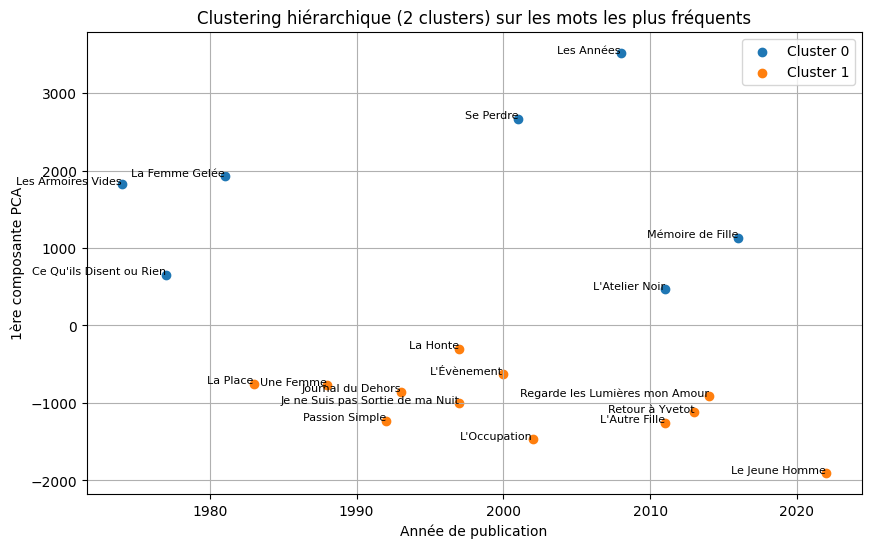

/var/folders/9m/zl8qrjf568b6fg17f2kxg8mr0000gn/T/ipykernel_36966/2515061694.py:155: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(dist_matrix, method='ward')


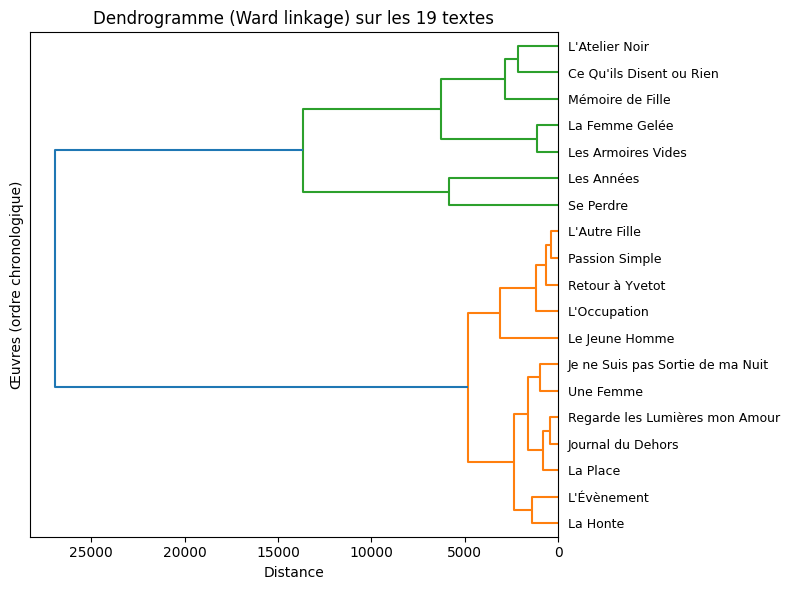

In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# SciPy pour le dendrogramme
import scipy.cluster.hierarchy as sch

# ------------------------------------------------
# 1) Lecture du fichier XML et extraction des textes
# ------------------------------------------------
fichier_xml = "/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml"
with open(fichier_xml, "r", encoding="utf-8") as file:
    full_text = file.read()

# On découpe après la balise <texte
segments = re.split(r"<texte", full_text)[1:]
texts = []
for seg in segments:
    match = re.search(r">(.*?)</texte>", seg, flags=re.DOTALL)
    if match:
        content = match.group(1).strip()
        texts.append(content)

print(f"Nombre de textes extraits : {len(texts)}")

# ------------------------------------------------
# 2) Liste des titres + années
# ------------------------------------------------
oeuvres = [
    "Les Armoires Vides", 
    "Ce Qu'ils Disent ou Rien", 
    "La Femme Gelée", 
    "La Place", 
    "Une Femme", 
    "Passion Simple", 
    "Journal du Dehors", 
    "Je ne Suis pas Sortie de ma Nuit", 
    "La Honte", 
    "L'Évènement",
    "Se Perdre", 
    "L'Autre Fille", 
    "L'Occupation", 
    "Les Années", 
    "L'Atelier Noir",
    "Retour à Yvetot", 
    "Regarde les Lumières mon Amour", 
    "Mémoire de Fille", 
    "Le Jeune Homme"
]

annees = [
    1974,  # Les Armoires Vides
    1977,  # Ce Qu'ils Disent ou Rien
    1981,  # La Femme Gelée
    1983,  # La Place
    1988,  # Une Femme
    1992,  # Passion Simple
    1993,  # Journal du Dehors
    1997,  # Je ne Suis pas Sortie de ma Nuit
    1997,  # La Honte
    2000,  # L'Évènement
    2001,  # Se Perdre
    2011,  # L'Autre Fille
    2002,  # L'Occupation (attention chrono)
    2008,  # Les Années
    2011,  # L'Atelier Noir
    2013,  # Retour à Yvetot
    2014,  # Regarde les Lumières mon Amour
    2016,  # Mémoire de Fille
    2022   # Le Jeune Homme
]

# Vérification
assert len(texts) == len(oeuvres) == len(annees), (
    "Le nombre de textes, de titres et d'années doit être identique !"
)

# ------------------------------------------------
# 3) Vectorisation des textes (CountVectorizer)
# ------------------------------------------------
# On extrait, par exemple, les 100 mots les plus fréquents
# - token_pattern pour inclure lettres accentuées
# - stop_words en français si ta version de scikit-learn le permet
#   sinon utilise ta liste perso ou 'english' pour tester
vectorizer = CountVectorizer(
    max_features=100,
    token_pattern=r"[a-zA-ZÀ-ÖØ-öø-ÿ]+",
    stop_words=None
    # stop_words='french' si ta version sklearn >= 1.0 le supporte
)

X = vectorizer.fit_transform(texts)  # shape : (19, 100)
print(f"Dimension de la matrice CountVectorizer : {X.shape}")

# ------------------------------------------------
# 4) Clustering hiérarchique (AgglomerativeClustering)
# ------------------------------------------------
# Ex. : 2 clusters, méthode 'ward' (euclidienne)
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = clustering.fit_predict(X.toarray())  # labels[i] = cluster du iᵉ texte

# ------------------------------------------------
# 5) (Optionnel) Réordonnancer par année croissante
# ------------------------------------------------
indices_tries = sorted(range(len(annees)), key=lambda i: annees[i])
annees_ordre = [annees[i] for i in indices_tries]
oeuvres_ordre = [oeuvres[i] for i in indices_tries]
labels_ordre = [labels[i] for i in indices_tries]
# On va aussi réordonner la matrice X
X_ordre = X[indices_tries, :]

# ------------------------------------------------
# 6) PCA pour obtenir 2 composantes (pour tracer un nuage)
# ------------------------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_ordre.toarray())  # shape : (19, 2)

# ------------------------------------------------
# 7) Visualisation : axe X = année, axe Y = 1ère composante PCA
# ------------------------------------------------
plt.figure(figsize=(10, 6))

for cluster_id in np.unique(labels_ordre):
    # Récupère les indices de ce cluster
    idx_cluster = [i for i, c in enumerate(labels_ordre) if c == cluster_id]
    
    # Abscisse = année, ordonnée = X_pca[i, 0]
    x_vals = [annees_ordre[i] for i in idx_cluster]
    y_vals = X_pca[idx_cluster, 0]
    
    plt.scatter(x_vals, y_vals, label=f"Cluster {cluster_id}")

# Annoter avec les titres
for i, (x_val, y_val) in enumerate(zip(annees_ordre, X_pca[:, 0])):
    plt.text(x_val, y_val, oeuvres_ordre[i], fontsize=8, ha='right')

plt.title("Clustering hiérarchique (2 clusters) sur les mots les plus fréquents")
plt.xlabel("Année de publication")
plt.ylabel("1ère composante PCA")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------
# 8) Dendrogramme complet (optionnel)
# ------------------------------------------------
# Pour le dendrogramme, on calcule la matrice de distances
dist_matrix = pairwise_distances(X_ordre.toarray(), metric='euclidean')
linkage_matrix = sch.linkage(dist_matrix, method='ward')

plt.figure(figsize=(8, 6))
sch.dendrogram(
    linkage_matrix,
    labels=oeuvres_ordre,
    orientation='left',
    leaf_font_size=9
)
plt.title("Dendrogramme (Ward linkage) sur les 19 textes")
plt.xlabel("Distance")
plt.ylabel("Œuvres (ordre chronologique)")
plt.tight_layout()
plt.show()

Nombre de textes extraits : 19
Dimensions de la matrice combinée normalisée : (19, 201)


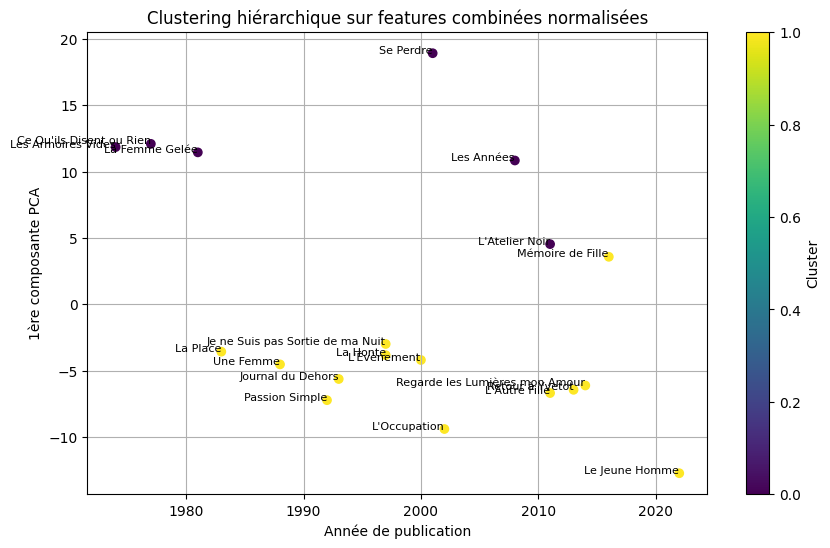

/var/folders/9m/zl8qrjf568b6fg17f2kxg8mr0000gn/T/ipykernel_36966/2793205270.py:175: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(dist_matrix, method='ward')


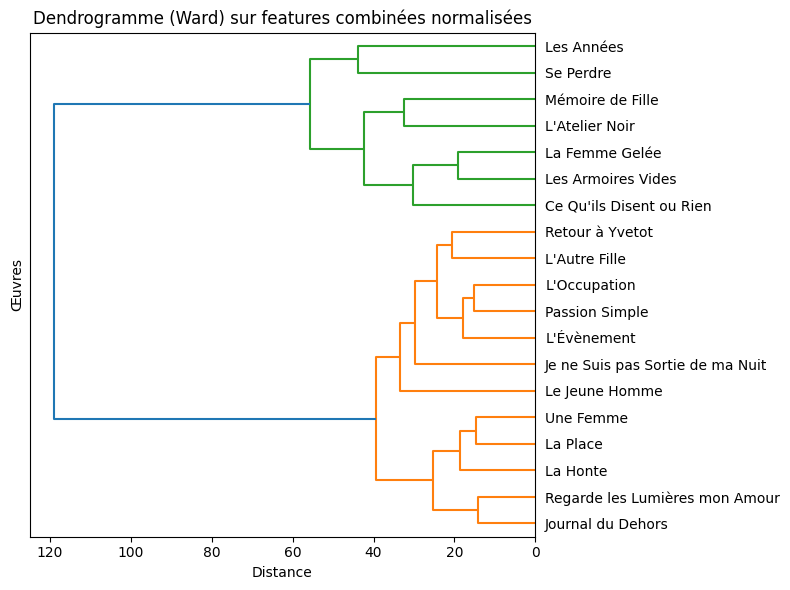

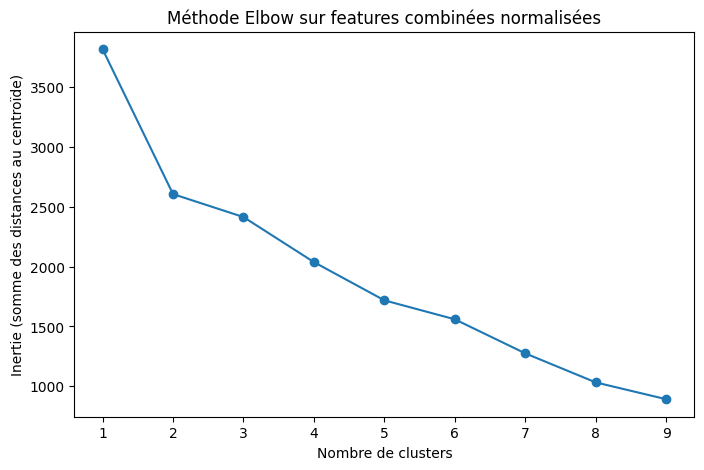

Labels obtenus par Label Propagation : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


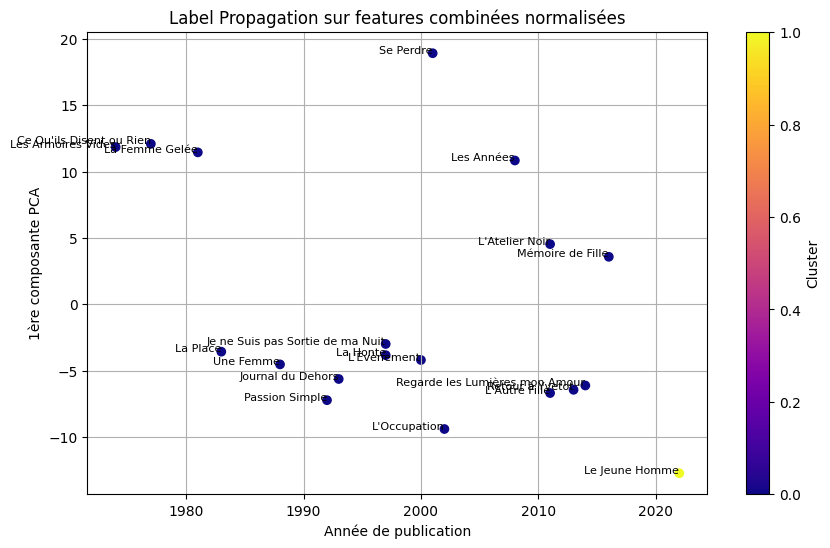

In [27]:
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch
from sklearn.semi_supervised import LabelPropagation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------------------------------------------
# 1) Lecture du fichier XML et extraction des textes
# ------------------------------------------------
fichier_xml = "/Users/chloe/Downloads/M2/Cours_Lejeune_M2/09_Annie-Ernaux/corpus_v1/corpus_Ernaux_v1.xml"
with open(fichier_xml, "r", encoding="utf-8") as file:
    full_text = file.read()

segments = re.split(r"<texte", full_text)[1:]
texts = []
for seg in segments:
    match = re.search(r">(.*?)</texte>", seg, flags=re.DOTALL)
    if match:
        content = match.group(1).strip()
        texts.append(content)

print(f"Nombre de textes extraits : {len(texts)}")

# ------------------------------------------------
# 2) Liste des titres et années
# ------------------------------------------------
oeuvres = [
    "Les Armoires Vides", 
    "Ce Qu'ils Disent ou Rien", 
    "La Femme Gelée", 
    "La Place", 
    "Une Femme", 
    "Passion Simple", 
    "Journal du Dehors", 
    "Je ne Suis pas Sortie de ma Nuit", 
    "La Honte", 
    "L'Évènement",
    "Se Perdre", 
    "L'Autre Fille", 
    "L'Occupation", 
    "Les Années", 
    "L'Atelier Noir",
    "Retour à Yvetot", 
    "Regarde les Lumières mon Amour", 
    "Mémoire de Fille", 
    "Le Jeune Homme"
]

annees = [
    1974,  # Les Armoires Vides
    1977,  # Ce Qu'ils Disent ou Rien
    1981,  # La Femme Gelée
    1983,  # La Place
    1988,  # Une Femme
    1992,  # Passion Simple
    1993,  # Journal du Dehors
    1997,  # Je ne Suis pas Sortie de ma Nuit
    1997,  # La Honte
    2000,  # L'Évènement
    2001,  # Se Perdre
    2011,  # L'Autre Fille
    2002,  # L'Occupation
    2008,  # Les Années
    2011,  # L'Atelier Noir
    2013,  # Retour à Yvetot
    2014,  # Regarde les Lumières mon Amour
    2016,  # Mémoire de Fille
    2022   # Le Jeune Homme
]

assert len(texts) == len(oeuvres) == len(annees), "Le nombre de textes, de titres et d'années doit être identique !"

# ------------------------------------------------
# 3) Extraction de la fréquence de phrases clivées
# ------------------------------------------------
def count_clivees(text):
    """
    Détecte la forme : "c’est ... que/qui" en ignorant la casse.
    """
    pattern = r"\bc['’]?est\s+.*?\s+(que|qui)\b"
    matches = re.findall(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    return len(matches)

clivee_counts = []
for txt in texts:
    nb_clivees = count_clivees(txt)
    words = re.findall(r"\w+", txt)
    nb_words = len(words) if words else 1
    freq_clivees = nb_clivees / nb_words
    clivee_counts.append(freq_clivees)

X_clivees = np.array(clivee_counts).reshape(-1, 1)  # Dimension : (19, 1)

# ------------------------------------------------
# 4) Extraction du Bag-of-Words
# ------------------------------------------------
count_vectorizer = CountVectorizer(
    max_features=100,
    token_pattern=r"[a-zA-ZÀ-ÖØ-öø-ÿ]+",
    stop_words=None
)
X_bow = count_vectorizer.fit_transform(texts).toarray()  # Dimension : (19, 100)

# ------------------------------------------------
# 5) Extraction du TF-IDF
# ------------------------------------------------
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,
    token_pattern=r"[a-zA-ZÀ-ÖØ-öø-ÿ]+",
    stop_words=None
)
X_tfidf = tfidf_vectorizer.fit_transform(texts).toarray()  # Dimension : (19, 100)

# ------------------------------------------------
# 6) Normalisation de chaque bloc de features
# ------------------------------------------------
scaler_clivees = StandardScaler()
X_clivees_scaled = scaler_clivees.fit_transform(X_clivees)

scaler_bow = StandardScaler()
X_bow_scaled = scaler_bow.fit_transform(X_bow)

scaler_tfidf = StandardScaler()
X_tfidf_scaled = scaler_tfidf.fit_transform(X_tfidf)

# ------------------------------------------------
# 7) Combinaison des features normalisées
# ------------------------------------------------
from numpy import hstack
X_combined_scaled = hstack([X_clivees_scaled, X_bow_scaled, X_tfidf_scaled])
print("Dimensions de la matrice combinée normalisée :", X_combined_scaled.shape)
# Dimensions attendues : (19, 1+100+100) = (19, 201)

# ------------------------------------------------
# 8) Clustering hiérarchique sur les features combinées
# ------------------------------------------------
n_clusters = 2  # Par exemple, avant et après 1983
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agglo = agglo.fit_predict(X_combined_scaled)

# Tri des données par année pour la visualisation
indices_triees = sorted(range(len(annees)), key=lambda i: annees[i])
annees_ordre = [annees[i] for i in indices_triees]
oeuvres_ordre = [oeuvres[i] for i in indices_triees]
labels_ordre_agglo = [labels_agglo[i] for i in indices_triees]

# ------------------------------------------------
# 9) Visualisation via PCA et scatter plot
# ------------------------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined_scaled)
X_pca_ordre = X_pca[indices_triees, :]

plt.figure(figsize=(10, 6))
sc = plt.scatter(annees_ordre, X_pca_ordre[:, 0], c=labels_ordre_agglo, cmap='viridis')
for i, point in enumerate(X_pca_ordre):
    plt.text(annees_ordre[i], point[0], oeuvres_ordre[i], fontsize=8, ha='right')
plt.title("Clustering hiérarchique sur features combinées normalisées")
plt.xlabel("Année de publication")
plt.ylabel("1ère composante PCA")
plt.grid(True)
plt.colorbar(sc, label="Cluster")
plt.show()

# ------------------------------------------------
# 10) Dendrogramme sur features combinées normalisées
# ------------------------------------------------
dist_matrix = pairwise_distances(X_combined_scaled, metric='euclidean')
linkage_matrix = sch.linkage(dist_matrix, method='ward')

plt.figure(figsize=(8, 6))
sch.dendrogram(linkage_matrix, labels=oeuvres, orientation='left', leaf_font_size=10)
plt.title("Dendrogramme (Ward) sur features combinées normalisées")
plt.xlabel("Distance")
plt.ylabel("Œuvres")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 11) Elbow Method avec K-Means sur X_combined_scaled
# ------------------------------------------------
inerties = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined_scaled)
    inerties.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inerties, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie (somme des distances au centroïde)")
plt.title("Méthode Elbow sur features combinées normalisées")
plt.show()

# ------------------------------------------------
# 12) Clustering par Label Propagation sur X_combined_scaled
# ------------------------------------------------
# Création d'un vecteur de labels initial (ici -1 signifie non étiqueté)
labels_init = -1 * np.ones(X_combined_scaled.shape[0])
# On étiquette par exemple le premier texte comme Cluster 0 et le dernier comme Cluster 1
labels_init[0] = 0
labels_init[-1] = 1

lp = LabelPropagation()
lp.fit(X_combined_scaled, labels_init)
labels_lp = lp.transduction_
print("Labels obtenus par Label Propagation :", labels_lp)

labels_ordre_lp = [labels_lp[i] for i in indices_triees]

plt.figure(figsize=(10, 6))
sc = plt.scatter(annees_ordre, X_pca_ordre[:, 0], c=labels_ordre_lp, cmap='plasma')
for i, point in enumerate(X_pca_ordre):
    plt.text(annees_ordre[i], point[0], oeuvres_ordre[i], fontsize=8, ha='right')
plt.title("Label Propagation sur features combinées normalisées")
plt.xlabel("Année de publication")
plt.ylabel("1ère composante PCA")
plt.grid(True)
plt.colorbar(sc, label="Cluster")
plt.show()